In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree, ensemble, metrics
from sklearn.model_selection import train_test_split

colors = ["navy", "turquoise", "darkorange", "cornflowerblue"]

df = pd.read_csv('bioresponse.csv')

X = df.drop('Activity', axis=1)
Y = df['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
# мелкое дерево решений
clf_sm = tree.DecisionTreeClassifier(max_depth=3, random_state=17)
clf_sm.fit(X_train, y_train)
y_sm_pred = clf_sm.predict(X_test)

# рассчитываем метрики
print("Доля правильных ответов:", metrics.accuracy_score(y_test, y_sm_pred))
print("Точность:", metrics.precision_score(y_test, y_sm_pred))
print("Полнота:", metrics.completeness_score(y_test, y_sm_pred))
print("Значение F1:", metrics.f1_score(y_test, y_sm_pred))
print("Логарифмическая потеря:", metrics.log_loss(y_test, y_sm_pred))

# визуализация
tree.plot_tree(clf_sm)

In [ ]:
# глубокое дерево решений
clf_deep = tree.DecisionTreeClassifier(max_depth=10, random_state=17)
clf_deep.fit(X_train, y_train)
y_deep_pred = clf_deep.predict(X_test)

# рассчитываем метрики
print("Доля правильных ответов:", metrics.accuracy_score(y_test, y_deep_pred))
print("Точность:", metrics.precision_score(y_test, y_deep_pred))
print("Полнота:", metrics.completeness_score(y_test, y_deep_pred))
print("Значение F1:", metrics.f1_score(y_test, y_deep_pred))
print("Логарифмическая потеря:", metrics.log_loss(y_test, y_deep_pred))

# визуализация
tree.plot_tree(clf_deep)

In [ ]:
# случайный лес на мелких деревья
rfc_sm = ensemble.RandomForestClassifier(n_estimators=3, random_state=0)
rfc_sm.fit(X_train, y_train)
y_frc_sm_pred = rfc_sm.predict(X_test)

# рассчитываем метрики
print("Доля правильных ответов:",
      metrics.accuracy_score(y_test, y_frc_sm_pred))
print("Точность:", metrics.precision_score(y_test, y_frc_sm_pred))
print("Полнота:", metrics.completeness_score(y_test, y_frc_sm_pred))
print("Значение F1:", metrics.f1_score(y_test, y_frc_sm_pred))
print("Логарифмическая потеря:", metrics.log_loss(y_test, y_frc_sm_pred))


In [ ]:
# случайный лес на глубоких деревья
rfc_dp = ensemble.RandomForestClassifier(n_estimators=20, random_state=0)
rfc_dp.fit(X_train, y_train)
y_frc_dp_pred = rfc_dp.predict(X_test)

# рассчитываем метрики
print("Доля правильных ответов:",
      metrics.accuracy_score(y_test, y_frc_dp_pred))
print("Точность:", metrics.precision_score(y_test, y_frc_dp_pred))
print("Полнота:", metrics.completeness_score(y_test, y_frc_dp_pred))
print("Значение F1:", metrics.f1_score(y_test, y_frc_dp_pred))
print("Логарифмическая потеря:", metrics.log_loss(y_test, y_frc_dp_pred))

In [ ]:
# построение кривых precision recall

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

values = [
    ('clf_sm', y_sm_pred, "Мелкое дерево решений"),
    ('clf_deep', y_deep_pred, "Глубокое дерево решений"),
    ('rfc_sm', y_frc_sm_pred, "Случайный лес на мелких деревьях "),
    ('rfc_dp', y_frc_dp_pred, "Случайный лес на глубоких деревьях")
]

for v in values:
    display = metrics.PrecisionRecallDisplay.from_predictions(y_test, v[1],
                                                              name=v[0])
    display.plot(ax=ax, name=v[2], color=colors[values.index(v)])

handles, labels = ax.get_legend_handles_labels()
handles.extend([l])

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("График Precision-Recall")


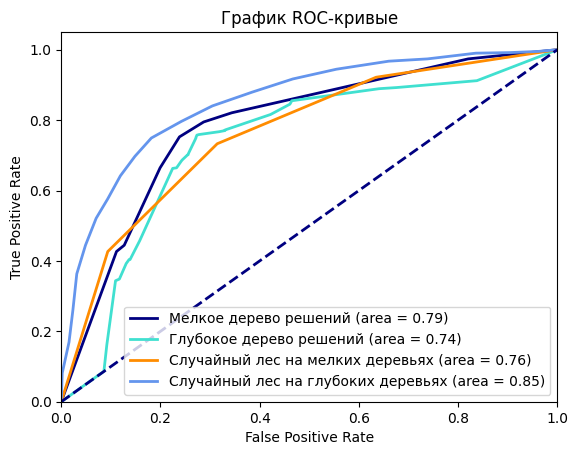

In [14]:
# построение roc кривых

fpr = dict()
tpr = dict()
roc_auc = dict()

values = [
    ('clf_sm', "Мелкое дерево решений (area = %0.2f)", clf_sm.predict_proba(X_test)[::,1]),
    ('clf_deep', "Глубокое дерево решений (area = %0.2f)", clf_deep.predict_proba(X_test)[::,1]),
    ('rfc_sm', "Случайный лес на мелких деревьях (area = %0.2f)", rfc_sm.predict_proba(X_test)[::,1]),
    ('rfc_dp', "Случайный лес на глубоких деревьях (area = %0.2f)", rfc_dp.predict_proba(X_test)[::,1])
]

for v in values:
    fpr[v[0]], tpr[v[0]], _ = metrics.roc_curve(y_test, v[2])
    roc_auc[v[0]] = metrics.roc_auc_score(y_test, v[2])

plt.figure()
lw = 2

for v in values:
    plt.plot(
        fpr[v[0]],
        tpr[v[0]],
        color=colors[values.index(v)],
        lw=lw,
        label=v[1] % roc_auc[v[0]],
    )

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("График ROC-кривые")
plt.legend(loc="lower right")
plt.show()